MainProcess


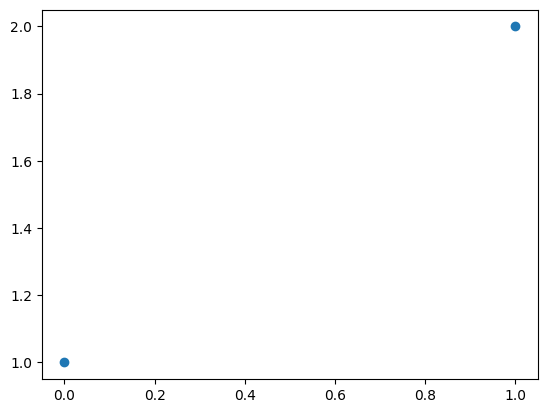

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

Dataset URL: https://www.kaggle.com/datasets/jeroencottaar/byu-many-models-2/versions/
License(s): unknown


100%|██████████| 922M/922M [00:08<00:00, 117MB/s]  



Downloaded metadata to /flagellar/results//many_full_res/dataset-metadata.json


In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 201
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 100
model.step1Labels.cos_lr = True
model.step1Labels.lrf = 0.0
model.step1Labels.patience = 0
#model.step1Labels.mixup = 0.0

In [5]:
model.train(loaded_data.train_data, loaded_data.test_data)
fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
import shutil
shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...


100%|██████████| 49.7M/49.7M [00:00<00:00, 319MB/s]


WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.130 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=100, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/flagellar/temp/training.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=201, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.0, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=motor_detector, nbs=64, nms=False, opset=None, optimize=False, opt

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 252MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2293.8±312.9 MB/s, size: 108.2 KB)


train: Scanning /flagellar/temp/yolo_dataset/labels/train... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:01<00:00, 2069.35it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1446.6±866.2 MB/s, size: 77.2 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<00:00, 2199.84it/s]


val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache
Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 201 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/201      4.82G      2.842       3.98      1.282         12        640: 100%|██████████| 249/249 [00:22<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00,  9.86it/s]

                   all        393        369      0.394      0.447      0.356     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/201       5.7G      2.267      1.953      1.097         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]


                   all        393        369      0.609      0.721      0.674      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/201       5.7G      2.131       1.78      1.059         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]

                   all        393        369      0.841       0.76      0.842        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/201       5.7G      2.041      1.638      1.043          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.31it/s]

                   all        393        369      0.457      0.605       0.47      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/201      5.71G      1.977      1.547      1.015         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.906      0.764      0.892      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/201      5.71G      1.871      1.478     0.9981         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.788      0.732      0.801      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/201      5.71G       1.83      1.386      0.993         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.877      0.792      0.847      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/201      5.71G      1.811      1.327     0.9818          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.893      0.851      0.926      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/201      5.71G       1.77      1.302     0.9751         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.941      0.835      0.939      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/201      5.71G      1.723      1.256     0.9626         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.923      0.874      0.928      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/201      5.71G      1.705      1.224      0.957         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.29it/s]

                   all        393        369      0.909      0.862      0.938      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/201      5.71G      1.697      1.197     0.9494          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.937      0.813      0.912      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/201      5.71G      1.629      1.151      0.935         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.943      0.911      0.949      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/201      5.71G      1.593      1.126      0.931         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.29it/s]

                   all        393        369      0.892      0.794      0.849      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/201      5.71G      1.599      1.091     0.9292         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.885       0.77        0.9      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/201      5.71G      1.591      1.108     0.9334         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.946      0.881      0.958      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/201      5.71G      1.573      1.094      0.915         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.21it/s]

                   all        393        369      0.951      0.846       0.93      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/201      5.71G       1.55      1.065     0.9181         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.949      0.921      0.942      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/201      5.71G      1.511      1.015     0.9052          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.23it/s]

                   all        393        369      0.938      0.921      0.961      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/201      5.71G      1.468      0.982     0.9029          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369       0.93      0.954      0.965      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/201      5.71G      1.483     0.9811     0.8979         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369      0.901      0.873      0.918      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/201      5.71G      1.448     0.9625     0.9013         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.945      0.892      0.954      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/201      5.71G      1.439     0.9414      0.897         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.958      0.918      0.965      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/201      5.71G      1.461     0.9424     0.8972         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.963      0.846      0.944      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/201      5.71G      1.397     0.9234     0.8878         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.955       0.93       0.96      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/201      5.71G      1.419     0.9246     0.8868         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.982      0.889      0.938      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/201      5.71G      1.376     0.9229     0.8917          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.971      0.916      0.969      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/201      5.71G      1.351     0.8769      0.883          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.964      0.942      0.964      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/201      5.71G      1.348     0.8546     0.8801         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.974      0.911      0.954      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/201      5.71G      1.336     0.8721     0.8759         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.965      0.894       0.96      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/201      5.71G      1.353     0.8562      0.881         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369       0.96      0.911      0.959       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/201      5.71G      1.329      0.845     0.8764          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.967      0.884      0.943       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/201      5.71G      1.298     0.8247     0.8706         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.985      0.897      0.956      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/201      5.71G      1.266     0.8237     0.8692          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.969      0.938      0.971      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/201      5.71G      1.264     0.8049      0.864         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.972      0.929      0.967      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/201      5.71G      1.266     0.7939     0.8702         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.977      0.935      0.972      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/201      5.71G       1.26     0.8186     0.8684          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.973      0.884      0.964      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/201      5.71G      1.255      0.822     0.8653         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.953      0.927      0.956       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/201      5.71G      1.216      0.777     0.8583         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.979      0.913       0.97      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/201      5.71G      1.222     0.7582     0.8567          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.977      0.934      0.964      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/201      5.71G      1.222      0.776     0.8659         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.931      0.924      0.957       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/201      5.71G      1.213      0.761     0.8592         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.969      0.918      0.967      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/201      5.71G      1.204     0.7526     0.8599          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369      0.985      0.892      0.951      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/201      5.71G      1.206     0.7519     0.8633         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369       0.97        0.9      0.963       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/201      5.71G      1.185     0.7605     0.8604          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.972      0.938      0.974      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/201      5.71G      1.189     0.7409     0.8542         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.965      0.927      0.967       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/201      5.71G      1.153     0.7271     0.8515          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.968      0.908      0.952      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/201      5.71G      1.174     0.7461     0.8541         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.944      0.927      0.957      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/201      5.71G      1.133     0.7248      0.847          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.24it/s]

                   all        393        369       0.98      0.935      0.971      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/201      5.71G      1.138     0.7071     0.8501          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.977      0.918      0.974      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/201      5.71G      1.146     0.7117     0.8538          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.985      0.902      0.965      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/201      5.71G      1.119     0.7051     0.8486         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.972       0.93      0.973      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/201      5.71G      1.117     0.7031     0.8504         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.958      0.921      0.968      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/201      5.71G      1.116     0.7042     0.8425          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369       0.97      0.867      0.951      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/201      5.71G       1.09     0.6712     0.8431          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.947      0.928      0.974       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/201      5.71G      1.087     0.6858     0.8445          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.952      0.922      0.967      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/201      5.71G      1.083     0.6751     0.8476          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.983       0.93      0.963       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/201      5.71G      1.065     0.6709     0.8384          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.967      0.905      0.953       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/201      5.71G      1.057     0.6458       0.84         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.954      0.905      0.958      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/201      5.71G      1.058      0.658     0.8397          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.982      0.899      0.959      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/201      5.71G      1.044     0.6441     0.8361          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.966      0.924       0.96      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/201      5.71G      1.068     0.6644     0.8416         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.965      0.906      0.957       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/201      5.71G      1.034      0.633     0.8385          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.968      0.927       0.96      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/201      5.71G      1.049     0.6443     0.8365          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.965      0.924      0.951      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/201      5.71G      1.014     0.6277     0.8353         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.969      0.927      0.973      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/201      5.71G      1.055     0.6475     0.8424         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369       0.98      0.894      0.952      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/201      5.71G      1.014     0.6145     0.8353          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.954      0.932      0.972      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/201      5.71G      1.003     0.6164     0.8303         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.982       0.91      0.954      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/201      5.71G      1.022      0.619     0.8354          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.963      0.932      0.972      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/201      5.71G      1.013     0.6132     0.8313          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.968      0.921      0.973      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/201      5.71G     0.9794      0.601     0.8299         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.61it/s]

                   all        393        369      0.962      0.932      0.963      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/201      5.71G     0.9794     0.5942     0.8249          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.959      0.921      0.962      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/201      5.71G      1.028     0.6288      0.835         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.961      0.936      0.971      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/201      5.71G     0.9653     0.5865     0.8291          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369      0.983      0.926      0.974      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/201      5.71G     0.9899     0.6139     0.8326          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.977      0.924      0.971      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/201      5.71G      0.984     0.5866     0.8273          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369       0.96      0.913      0.972      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/201      5.71G     0.9516     0.5798     0.8276          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.969      0.923       0.97      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/201      5.71G      0.949     0.5747     0.8254          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.61it/s]

                   all        393        369      0.974      0.928      0.971      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/201      5.71G     0.9727     0.5929     0.8325          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.944      0.919      0.959      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/201      5.71G     0.9581      0.586     0.8292         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.965      0.908      0.955      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/201      5.71G     0.9364     0.5726     0.8251         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.972      0.921      0.964      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/201      5.71G     0.9223     0.5617     0.8256          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.981      0.919       0.97      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/201      5.71G     0.9408     0.5657     0.8299         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.965      0.924       0.97       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/201      5.71G     0.9193     0.5731     0.8202         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.985       0.91      0.963      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/201      5.71G     0.9224     0.5572     0.8242         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.979      0.916      0.964      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/201      5.71G     0.9126     0.5423     0.8254          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.958      0.919      0.963      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/201      5.71G     0.8944     0.5371     0.8217         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.966      0.921      0.965      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/201      5.71G     0.8962     0.5475     0.8202         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.983      0.902      0.973      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/201      5.71G     0.8978     0.5481     0.8197          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.972      0.929      0.982      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/201      5.71G     0.8905      0.553     0.8208         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.991      0.913      0.965      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/201      5.71G     0.9066     0.5415     0.8232          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369       0.99      0.919      0.971      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/201      5.71G      0.914     0.5446     0.8227         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.969       0.92      0.958      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/201      5.71G     0.8755     0.5212     0.8155         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.977      0.924      0.964      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/201      5.71G     0.9014     0.5394     0.8215         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.991      0.908      0.954      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/201      5.71G     0.8676     0.5308     0.8174          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.971      0.917      0.964      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/201      5.71G     0.8665     0.5155     0.8169          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.985       0.93      0.965      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/201      5.71G     0.8723     0.5367     0.8175         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.974      0.927      0.969      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/201      5.71G     0.8449     0.5108     0.8091          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.971      0.905      0.968      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/201      5.71G     0.8475     0.5103     0.8148         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369       0.98      0.913      0.964      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/201      5.71G     0.8475     0.5131     0.8142         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.979      0.913      0.959      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/201      5.71G     0.8574     0.5145     0.8152          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.31it/s]

                   all        393        369      0.955      0.922      0.966      0.606


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/201      5.71G     0.6542     0.3454     0.7919          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369       0.96      0.932       0.97      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/201      5.71G     0.6287     0.3435     0.7873          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.967      0.924      0.959      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/201      5.71G     0.6402     0.3449      0.787         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.984      0.927      0.974      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/201      5.71G     0.6385     0.3425     0.7826          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.974       0.93      0.969      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/201      5.71G     0.6245     0.3372     0.7866          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.985      0.927      0.971      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/201      5.71G     0.6102     0.3328     0.7868          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.979      0.935      0.976      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/201      5.71G     0.6071     0.3206     0.7872          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369       0.98       0.93      0.972       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/201      5.71G     0.5974     0.3242      0.789         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.977       0.93      0.962      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/201      5.71G     0.5886     0.3181     0.7854          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.978       0.93      0.971      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/201      5.71G     0.5865      0.325     0.7813          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.983      0.929      0.972      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/201      5.71G     0.5767     0.3193     0.7838         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369       0.98      0.937      0.967      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/201      5.71G     0.5817     0.3184     0.7811          5        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.983      0.932      0.974      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/201      5.71G     0.5747     0.3139     0.7869          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.988      0.921       0.97      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/201      5.71G      0.558     0.3086     0.7854          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369       0.98      0.923      0.955        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/201      5.71G     0.5614     0.3098     0.7816          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.987      0.919      0.966       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/201      5.71G     0.5688     0.3059     0.7829          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.991      0.919      0.964      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/201      5.71G     0.5443     0.2996     0.7751          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.988      0.924      0.967      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/201      5.71G     0.5358     0.2986     0.7786          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.988      0.911      0.956       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/201      5.71G     0.5428     0.3011     0.7779          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.991      0.923      0.958      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/201      5.71G      0.547     0.2965     0.7822          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.988      0.921      0.952      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/201      5.71G     0.5599     0.3016     0.7839          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.985       0.92      0.957       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/201      5.71G     0.5324     0.2889     0.7799         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.983      0.923      0.963      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/201      5.71G     0.5262     0.2876     0.7761          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369       0.98      0.928      0.966      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/201      5.71G     0.5205     0.2836     0.7792          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.982       0.93      0.966       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/201      5.71G     0.5221     0.2875     0.7774          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.972      0.927      0.967      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/201      5.71G      0.506     0.2822     0.7757         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.956      0.949      0.971      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/201      5.71G     0.4985     0.2759     0.7789          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.988       0.91      0.971      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/201      5.71G     0.5138     0.2757     0.7807          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.985       0.92      0.965      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/201      5.71G     0.4916     0.2713      0.773          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369       0.99      0.919      0.967      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/201      5.71G     0.5014     0.2726     0.7773          6        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.977      0.922      0.962      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/201      5.71G     0.5026     0.2796     0.7746          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.984      0.913      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/201      5.71G     0.4945     0.2722      0.779         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.985      0.924      0.967       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/201      5.71G     0.4829     0.2681     0.7806          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.991      0.921      0.966      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/201      5.71G     0.4696     0.2665     0.7766          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369       0.99      0.924      0.964      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/201      5.71G     0.4914     0.2686     0.7775          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.986      0.925      0.966      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/201      5.71G     0.4749     0.2701     0.7736          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.982      0.924      0.965      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/201      5.71G     0.4728     0.2607     0.7804          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.985      0.924       0.97      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/201      5.71G     0.4677     0.2624     0.7716          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.984      0.924       0.97      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/201      5.71G     0.4537     0.2555     0.7785          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.969      0.925       0.97      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/201      5.71G     0.4638     0.2564     0.7785          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.964      0.932       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/201      5.71G     0.4581     0.2571     0.7748          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.956      0.946      0.969       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/201      5.71G     0.4544     0.2563     0.7771          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.948      0.938      0.965      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/201      5.71G     0.4477     0.2527     0.7764          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.959       0.94      0.966      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/201      5.71G     0.4519     0.2532     0.7727          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.95it/s]

                   all        393        369      0.961      0.935      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/201      5.71G     0.4318     0.2479     0.7708         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.972      0.932      0.963      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/201      5.71G     0.4392     0.2477     0.7736          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.966       0.93      0.962       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/201      5.71G     0.4434     0.2469     0.7764          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.95it/s]

                   all        393        369      0.961       0.93      0.962      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/201      5.71G     0.4352     0.2473     0.7705          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.955       0.93      0.961       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/201      5.71G      0.432     0.2411     0.7752         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.988      0.918      0.963      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/201      5.71G     0.4226     0.2392     0.7748          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369      0.988      0.918      0.962      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/201      5.71G      0.423     0.2399     0.7711          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.988      0.919      0.963      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/201      5.71G     0.4241     0.2374     0.7746          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.986      0.927      0.965      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/201      5.71G     0.4194     0.2356     0.7744          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.988      0.925      0.964      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/201      5.71G     0.4215     0.2368     0.7785         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.988      0.915      0.964      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/201      5.71G     0.4096     0.2331     0.7704          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.988      0.916      0.963      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/201      5.71G     0.4088     0.2348      0.772          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.988      0.916      0.963      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/201      5.71G     0.4073     0.2324     0.7694          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.988      0.921      0.963      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/201      5.71G     0.4017     0.2296      0.771          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.988      0.921      0.963      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/201      5.71G     0.3947     0.2275     0.7665          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.988      0.923      0.963      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/201      5.71G     0.3905     0.2235     0.7684          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.988      0.921      0.963      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/201      5.71G     0.4035     0.2265     0.7751         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.983      0.916      0.963      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/201      5.71G     0.3938     0.2255     0.7722          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369       0.98      0.926      0.964       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/201      5.71G     0.3939     0.2258     0.7708          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.965      0.932      0.964      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/201      5.71G     0.3918      0.224     0.7677          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.51it/s]

                   all        393        369      0.988      0.909      0.964      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/201      5.71G     0.3815     0.2228     0.7718          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.988      0.916      0.964      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/201      5.71G     0.3859     0.2186     0.7697          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.987      0.919      0.963      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/201      5.71G     0.3794     0.2194     0.7697          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.953      0.932      0.963      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/201      5.71G     0.3858     0.2178     0.7763          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.953      0.932      0.963      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/201      5.71G     0.3769     0.2137     0.7701          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.956      0.932      0.963      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/201      5.71G     0.3774     0.2185     0.7701          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.964      0.932      0.963      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/201      5.71G     0.3771     0.2185     0.7716          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369      0.981       0.93      0.963       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/201      5.71G     0.3697     0.2091     0.7696          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.988      0.926      0.963      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/201      5.71G     0.3733     0.2133     0.7684          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.988      0.919      0.963      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/201      5.71G     0.3717     0.2157     0.7628          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.964      0.932      0.963      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/201      5.71G     0.3686     0.2126     0.7708          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.969      0.932      0.964      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/201      5.71G     0.3738     0.2159     0.7732          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.964      0.932      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/201      5.71G     0.3686     0.2177      0.766          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.966      0.932      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/201      5.71G     0.3651     0.2088     0.7728          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.969      0.932      0.964      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/201      5.71G     0.3669     0.2099       0.77          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.969      0.932      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/201      5.71G     0.3625     0.2085     0.7766          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.964      0.932      0.963      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/201      5.71G     0.3667     0.2087     0.7714          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.966      0.932      0.964      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/201      5.71G     0.3583     0.2071     0.7667          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.966      0.932      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/201      5.71G     0.3559     0.2044     0.7675          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.966      0.932      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/201      5.71G     0.3616     0.2089     0.7708         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.969      0.932      0.964       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/201      5.71G     0.3606     0.2083     0.7706         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.966      0.932      0.964      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/201      5.71G      0.355     0.2056     0.7688          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.966      0.932      0.964      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/201      5.71G     0.3561     0.2069     0.7697          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.966      0.932      0.964      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/201      5.71G     0.3579     0.2051     0.7692          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.966      0.932      0.964      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/201      5.71G     0.3526     0.2037     0.7713          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.966      0.932      0.963      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/201      5.71G     0.3517     0.2073     0.7676          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369      0.966      0.932      0.964      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/201      5.71G     0.3587     0.2082     0.7712          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.966      0.932      0.964      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/201      5.71G      0.353     0.2042     0.7661          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.966      0.932      0.963      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/201      5.71G     0.3524     0.2014     0.7702          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.966      0.932      0.963      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/201      5.71G     0.3498     0.2024     0.7693          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.966      0.932      0.963      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/201      5.71G     0.3495     0.2043     0.7654          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.966      0.932      0.963      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/201      5.71G     0.3448     0.2023     0.7691          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.966      0.932      0.964      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/201      5.71G     0.3499     0.2025     0.7663          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.966      0.932      0.963      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/201      5.71G     0.3499     0.2026     0.7718          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.966      0.932      0.963      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/201      5.71G     0.3576     0.2063     0.7657          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.966      0.932      0.963      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/201      5.71G     0.3517     0.2023     0.7677          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.966      0.932      0.963      0.624



201 epochs completed in 1.212 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 52.0MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 52.0MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.90it/s]


                   all        393        369      0.992      0.883      0.974      0.626
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!


In [6]:
import ultralytics
import time
test_data = loaded_data.test_data
data_list = []
times = []
epoch_list = np.arange(0,201,20)
for epoch in epoch_list:
    t=time.time()
    model = fls.dill_load(fls.temp_dir + '/intermediate_weights/model.pickle')
    model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
    model.step1Labels.concentration = 2
    model.run_in_parallel=True
    data_list.append(model.infer(test_data))
    times.append(time.time()-t)
    fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
fls.dill_save(fls.temp_dir + 'intermediate_data.pickle', data_list)

Clearing cupy


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-1
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  confidence
0   657  427  737    0.600098
1   629  118  395    0.590820
2   589  353  472    0.563965
3   667  770  430    0.464844
4   661  415  336    0.383057
..  ...  ...  ...         ...
60  671  792  128    0.123779
61  210  812  689    0.122498
62  697  650  350    0.121277
63  589  311  548    0.120850
64  709  519  479    0.120422

[65 rows x 4 columns]

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  confidence
0   380  393  873    0.789062
1   372  371  885    0.456055
2   465  315  595    0.450439
3   429  284  880    0.436768
4   477  277  835    0.422607
5   394  422  510    0.407227
6   445  234  884    0.406494
7   479  442  921

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-2
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  769  384  153    0.296631
1  625  324  531    0.259033
2  599  350  473    0.216675
3  655  424  346    0.137085
4  589  322  548    0.095337

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  294  834    0.539062

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  411  280  510    0.219971
1  326  424  672    0.083862
2  403  263  506    0.079224
3  248  550  632    0.061646
4  316  570  285    0.060516
5  447  408  639    0.059418
6  423  682  682    0.058777
7  270  560  878    0.057709
8  384  617  850    

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-3
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  confidence
0   595  346  475    0.098755
1    84  534  775    0.083618
2   685  492  432    0.074768
3   559  412  711    0.054993
4   539  361  507    0.048676
5   615  298  108    0.042236
6   294    9  597    0.027802
7   623  323  616    0.027176
8   685  790   67    0.025620
9   657  423  345    0.024796
10  220   70  454    0.023911
11  172  359   11    0.022797
12  543  377  503    0.021652

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  453  273  642    0.395996
1  421  293  834    0.250977
2  489  876  407    0.183594
3  394  274  653    0.178955
4  471  271  652    0.127686

Clearing pytorch
Clearing cupy
Processing tom

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-4
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  599  437  292    0.196777
1  589  326  548    0.082703

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  832    0.496094
1  451  730  414    0.226074
2  449  558  453    0.173828
3  487  882  405    0.116760

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  415  277  510    0.416748

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  100  620  371    0.542969

Clearing pytorch
Clearing cupy
Proces

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-5
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  621  324  620    0.398926
1  599  438  292    0.166626
2  657  424  347    0.137085
3  635  308   95    0.111633
4  617  702  884    0.081238

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  294  832    0.835449

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  409  278  509    0.612305
1  368  751  682    0.130737

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  619  374     0.73584

Clearing

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-6
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  615  300  107    0.704102
1  589  326  547    0.556641
2  599  437  292    0.349609
3  539  364  505    0.172729

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  832    0.507812
1  451  256  673    0.216064

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  409  279  511    0.647949
1  368  751  681    0.182373

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  374    0.695801

Clearing

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-7
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0   74    6  436    0.116760
1   86    6  373    0.083862
2  615  298  107    0.048492
3  158    5  350    0.033478
4  108    6  359    0.023865

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  834    0.379395

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  409  278  510    0.407227
1  368  750  683    0.176147

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  375    0.135254

Clearing

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-8
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  599  437  292    0.106323
1  589  326  548    0.089111

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  834    0.492188

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  368  750  682    0.503906
1  409  278  510    0.180664

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  375    0.197388

Clearing pytorch
Clearing cupy
Processing tomogram tomo_1da0da (1/1)
Processing 400 out of 800 

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-9
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  104    6  354    0.096375
1   76    6  434    0.071045
2  599  437  292    0.047089
3  158    5  347    0.041473
4  200    5  321    0.026062

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  833    0.181274

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  368  750  682    0.324219

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  375    0.097046

Clearing pytorch
Clearing cupy
Proces

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-10
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z  y    x  confidence
0  108  6  356    0.161865
1  158  5  347    0.087280
2   76  6  434    0.073425
3  200  5  321    0.052612

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  833    0.107056

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  368  750  682    0.562012

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  375    0.048676

Clearing pytorch
Clearing cupy
Processing tomogram tomo_1da0da (1/1)
Proces

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


SpawnPoolWorker-11
CUDA_VISIBLE_DEVICES= 0
Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z  y    x  confidence
0  108  6  356    0.134766
1  158  5  347    0.061188
2   76  6  434    0.054993
3  200  5  321    0.037903

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  421  293  833    0.104126

Clearing pytorch
Clearing cupy
Processing tomogram tomo_53c71b (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  368  750  682    0.549805

Clearing pytorch
Clearing cupy
Processing tomogram tomo_bcb115 (1/1)
Processing 150 out of 300 slices (CONCENTRATION=2)
FINAL
     z    y    x  confidence
0  102  618  375    0.045013

Clearing pytorch
Clearing cupy
Processing tomogram tomo_1da0da (1/1)
Proces

In [7]:
times

[426.7633719444275,
 383.07035183906555,
 370.1902003288269,
 369.45662117004395,
 359.8120188713074,
 356.93811798095703,
 353.8420674800873,
 354.6119017601013,
 356.52474331855774,
 355.796763420105,
 354.9160521030426]

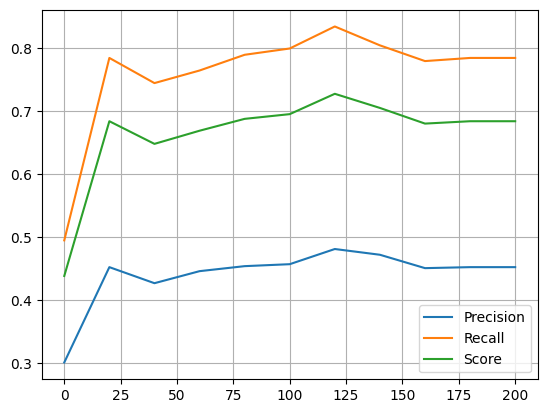

In [8]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Precision', 'Recall', 'Score'])

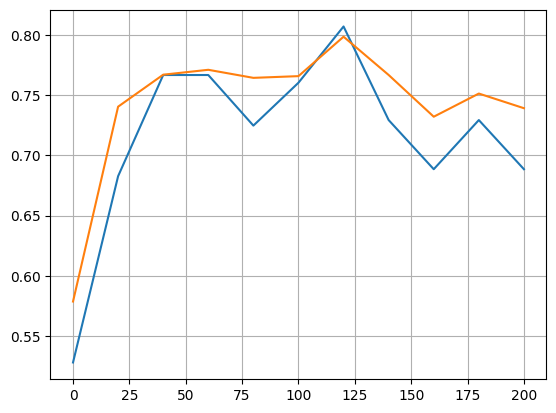

In [10]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores1 = []
scores2 = []
for d in data_list:
    inds = np.arange(len(test_data))
    np.random.default_rng(seed=0).shuffle(inds)   
    mid = len(inds)//2
    d2 = []
    test_data2 = []
    for ii in inds:
        d2.append(d[ii])
        test_data2.append(test_data[ii])
    a,b = flg_diagnostics.expand_and_reinfer(d2, test_data2, model.step3Output.select_motors, 0.7)
    scores1.append(fls.score_competition_metric(a[:mid],b[:mid])[2])
    scores2.append(fls.score_competition_metric(a[mid:],b[mid:])[2])
plt.plot(epoch_list,scores1)
plt.plot(epoch_list,scores2)
plt.grid(True)

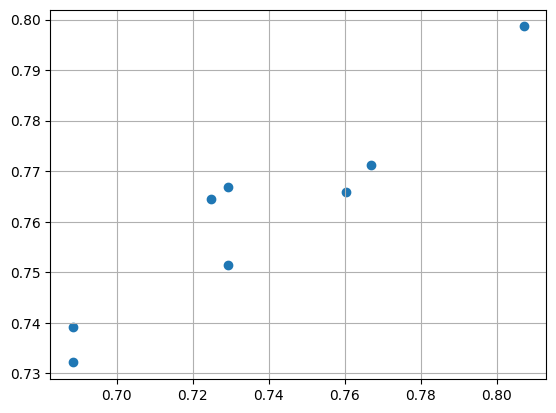

In [11]:
plt.figure()
plt.scatter(scores1[3:],scores2[3:])
plt.grid(True)

yolov8m with extra data

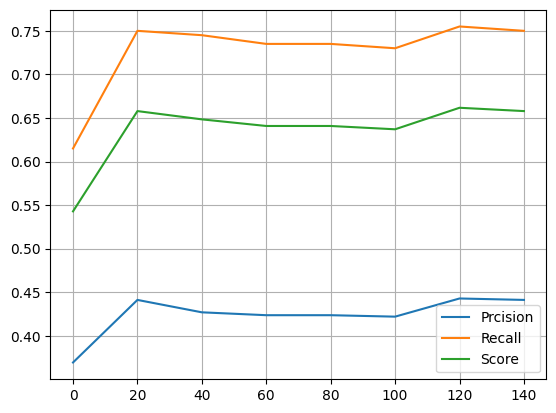

yolov8m no extra data

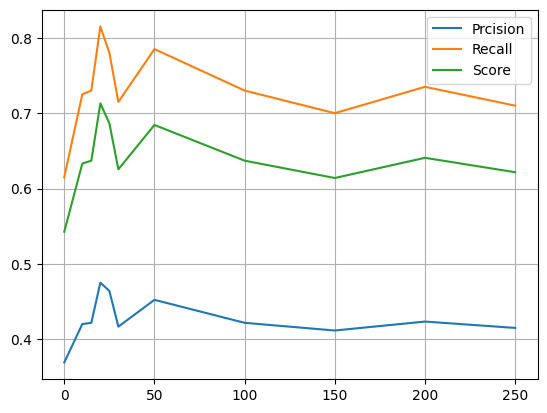

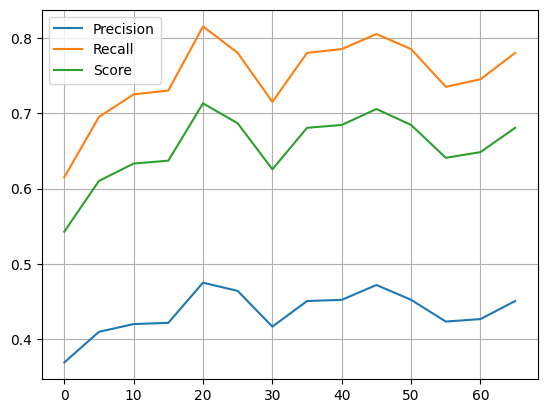

yolov8m no extra data no mosaic

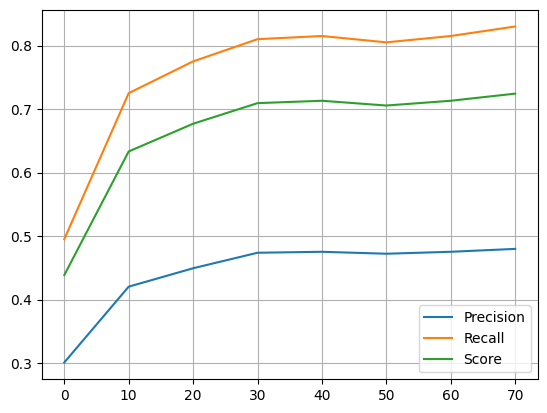

yolov8m no extra data no mosaic no cos_lr

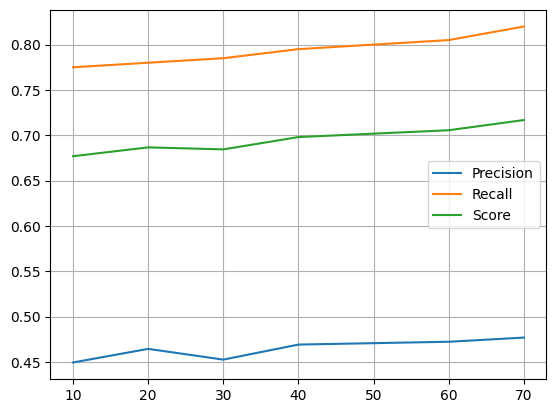

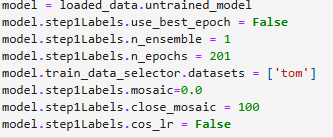

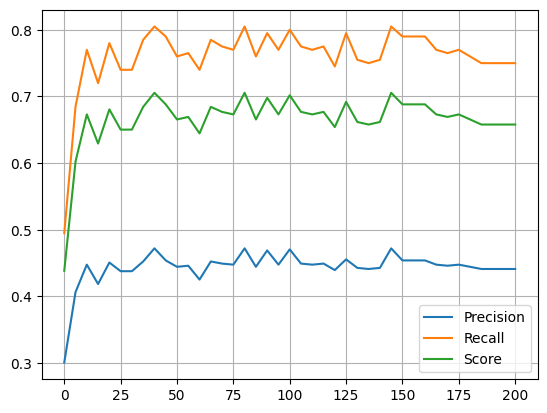

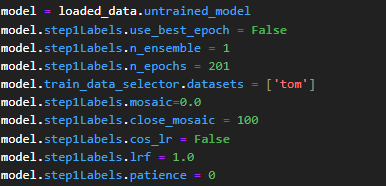

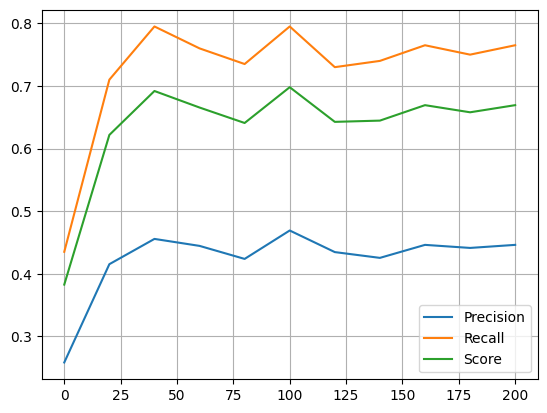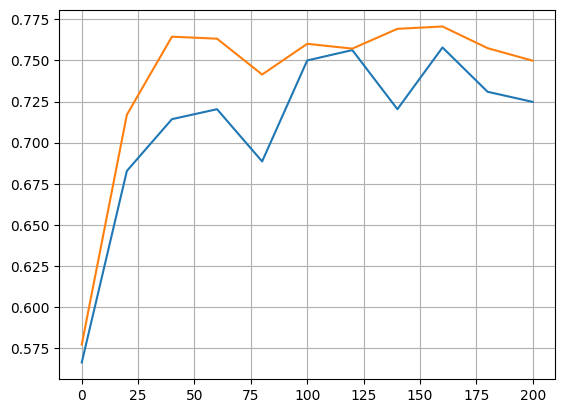

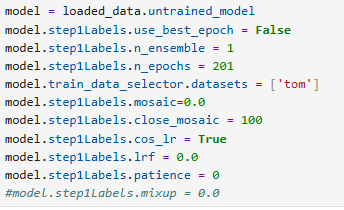

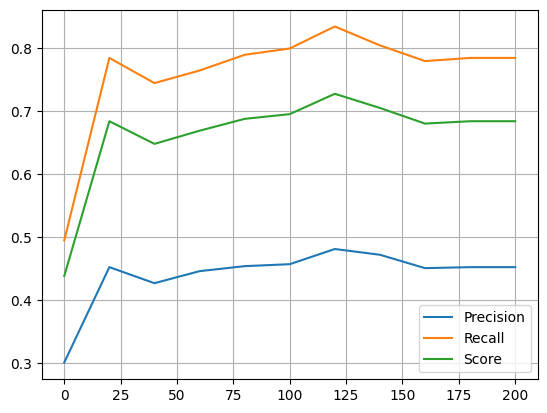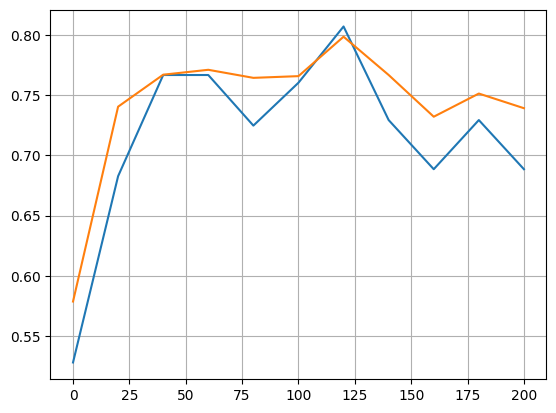

In [ ]:
import subprocess
def do_upload(library_name, local_dir):
    if fls.env=='vast':
        subprocess.run('rm -rf /kaggle_temp', shell=True)
        subprocess.run('mkdir /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets metadata -p /kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cp '+local_dir+' /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets version -p /kaggle_temp/ -m '+'x', shell=True)
    else:
        subprocess.run('cd d:/ && rd /s /q kaggle_temp', shell=True)
        subprocess.run('cd d:/ && d: && mkdir kaggle_temp', shell=True)
        subprocess.run('kaggle datasets metadata -p d:/kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cd d:/kaggle_temp/ && d: && copy '+local_dir+' d:', shell=True)
        subprocess.run('kaggle datasets version -p d:\\kaggle_temp\\ -m '+'x', shell=True)

In [ ]:
#do_upload('jeroencottaar/my-flg-models', fls.temp_dir + '/intermediate_weights/*.*')

In [ ]:
model.step1Labels.trained_model[0]